## Análise Fatorial PCA
### Naime Andere

#### Project: Analise dos valores de imóveis

Content: https://naime-andere.notion.site/Unsupervised-Machine-Learning-An-lise-Fatorial-e-PCA-be9a43fe565a46d3ba021575fd18073d?pvs=4

Linkedin: https://www.linkedin.com/in/naimeandere/ 

Github: https://github.com/NaimeAndere

##### Instalando os pacotes

In [2]:
!pip install pandas
!pip install numpy
!pip install factor_analyzer
!pip install sympy
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install pingouin
!pip install pyshp

Defaulting to user installation because normal site-packages is not writeable


##### Importando os pacotes necessários

In [3]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go

##### Importando o banco de dados

In [4]:
casas = pd.read_excel("preco_casas.xlsx")
# Fonte: adaptado de https://www.kaggle.com/datasets/elakiricoder/jiffs-house-price-prediction-dataset

É possível extrairmos fatores que capturem o preço de venda das casas?

In [5]:
#Criar a Estatísticas descritiva das variáveis
tab_desc = casas.describe()

In [6]:
print(tab_desc)

       land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
count    4954.000000     4954.000000  4954.000000      4954.000000   
mean      250.131409      231.250908     3.788252         3.199839   
std       103.131939       94.571642     1.585371         1.602300   
min       100.000000       85.000000     1.000000         1.000000   
25%       180.000000      165.000000     3.000000         2.000000   
50%       235.000000      217.500000     4.000000         3.000000   
75%       295.000000      274.000000     5.000000         4.000000   
max       796.000000      760.000000     8.000000         9.000000   

       distance_to_school    house_age  distance_to_supermarket_km  \
count         4954.000000  4954.000000                 4954.000000   
mean             3.454219    11.444691                    3.508639   
std              2.007358     6.356991                    1.991266   
min              0.100000     1.000000                    0.100000   
25%              1.

#####  Analisando as correlações de Pearson

In [7]:
# Matriz de correlações
corr = casas.corr()

In [8]:
# Gráfico interativo -> PLOTLY

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 750,
    width = 750,
    yaxis=dict(autorange="reversed"))

fig.show()

##### Selecionando as variáveis de interesse para a análise

In [10]:
# Vamos deixar o preço das casas de fora da análise fatorial! 

casas_pca = casas.drop(columns=['property_value'])

#####  Teste de Esfericidade de Bartlett

O Teste de Esfericidade de Bartlett verifica se as variáveis de uma matriz de covariância são independentes. Ele testa se a matriz é uma matriz identidade. Se o valor p for menor que 0,05, rejeitamos a hipótese nula de independência. O teste é usado em análise fatorial e análise de componentes principais para avaliar a adequação dos dados. É sensível ao tamanho da amostra e assume normalidade dos dados.

https://naime-andere.notion.site/Teste-de-Esfericidade-de-Bartlett-62c3e50545244a979157409a9329a897?pvs=4

In [13]:
bartlett, p_value = calculate_bartlett_sphericity(casas_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 31857.46
p-valor: 0.0


##### Teste de hipótese com p-valor

https://naime-andere.notion.site/Hip-teses-nula-H0-e-Hip-tese-alternativa-H1-82d211f321b646ac87d2d258e2296ce4?pvs=4

##### Definindo a PCA (procedimento inicial extraindo todos os fatores possíveis)

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade que transforma dados em um novo conjunto de variáveis não correlacionadas chamadas componentes principais. Esses componentes são ordenados por variância, com o primeiro componente capturando a maior variância nos dados. A PCA é usada para simplificar dados, reduzir ruído e melhorar a visualização. Ela é amplamente aplicada em áreas como processamento de imagens, reconhecimento de padrões e análise de dados.

https://naime-andere.notion.site/PCA-An-lise-de-Componentes-Principais-7e3824084cea4998a86b06c0e32434de?pvs=4

In [14]:
fa = FactorAnalyzer(n_factors=8, method='principal', rotation=None).fit(casas_pca)

##### Obtendo os autovalores  //  autovalores totalizam o valor das quantidade de variavies

Autovalores são números que representam a quantidade de variância explicada por cada componente principal em uma análise de componentes principais (PCA). Eles são obtidos a partir da matriz de covariância dos dados. Autovalores maiores indicam componentes principais que explicam mais variância nos dados. A soma de todos os autovalores é igual à variância total dos dados. Autovalores são usados para determinar o número de componentes principais a serem retidos para análise.

https://naime-andere.notion.site/Autovalores-e-Autovetores-eff71adb32a248fa934a3b0124e2e142?pvs=4

In [15]:
autovalores = fa.get_eigenvalues()[0]

print(autovalores)

# Soma dos autovalores

round(autovalores.sum(), 3)

[3.44078793 1.01989592 1.01155913 0.99164638 0.97675882 0.42231466
 0.128448   0.00858917]


8.0

##### Critério de Kaiser (raiz latente)

O critério de Kaiser, também conhecido como regra da raiz latente, é um método para determinar o número de componentes principais a serem retidos em uma análise de componentes principais (PCA). Este critério sugere que apenas os componentes principais com autovalores maiores que 1 devem ser mantidos. Isso significa que apenas os componentes que explicam mais variância do que uma variável original são considerados significativos. O critério de Kaiser é simples de aplicar, mas pode ser conservador, às vezes retendo muitos componentes.

https://naime-andere.notion.site/Crit-rio-de-Kaiser-2f99788590534cc2a34c809ae583febe?pvs=4

In [16]:
# Temos 3 autovalores maiores do que 1
# Vamos parametrizar a função para a extração de 3 fatores!

fa = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(casas_pca)

##### Eigenvalues, variâncias e variâncias acumuladas


https://naime-andere.notion.site/Eigenvalues-valor-pr-prio-285a5b3d132247bfb94c79e3e2cb9a8e?pvs=4

In [17]:
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   3.440788   0.430098             0.430098
Fator 2   1.019896   0.127487             0.557585
Fator 3   1.011559   0.126445             0.684030


##### Gráfico da variância acumulada dos componentes principais

C:\Users\naime\AppData\Local\Temp\ipykernel_24244\2940938648.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




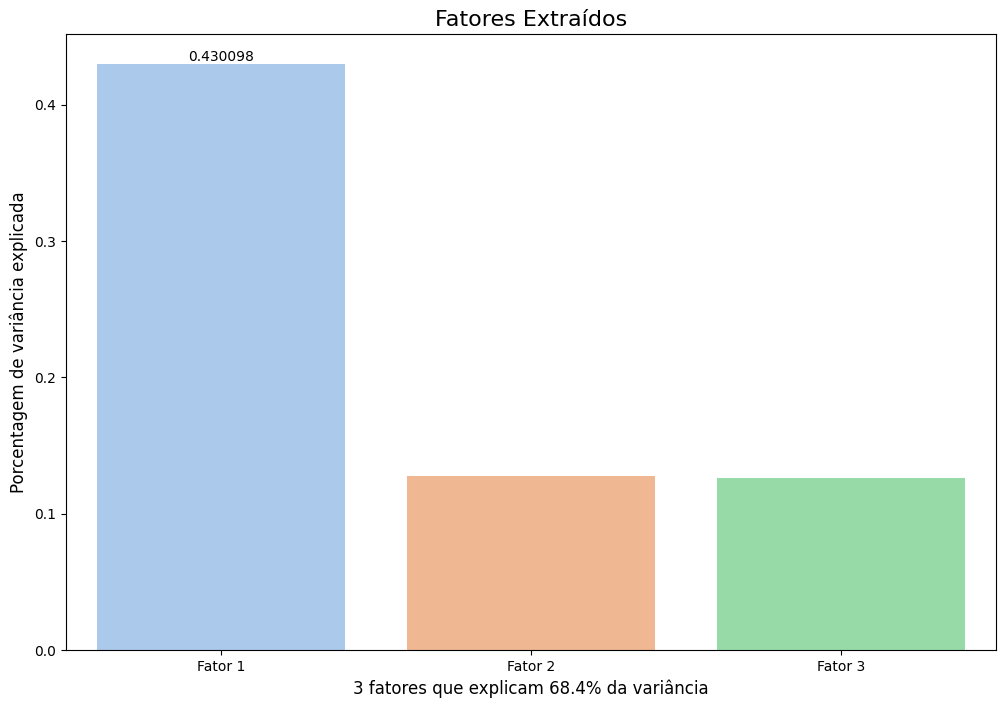

In [18]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='pastel')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

##### Determinando as cargas fatoriais

In [19]:
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = casas_pca.columns

print(tabela_cargas)


                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.969318  0.000670  0.003416
house_size_sqm              0.967866 -0.000800  0.005045
no_of_rooms                 0.948705 -0.002536  0.002939
no_of_bathrooms             0.814810 -0.002453 -0.002870
distance_to_school         -0.013787  0.349991  0.642441
house_age                   0.007448  0.080374  0.692606
distance_to_supermarket_km -0.000987  0.720297 -0.113461
crime_rate_index            0.015520  0.610001 -0.325882


##### Analisando as cargas fatoriais em cada fator extraído

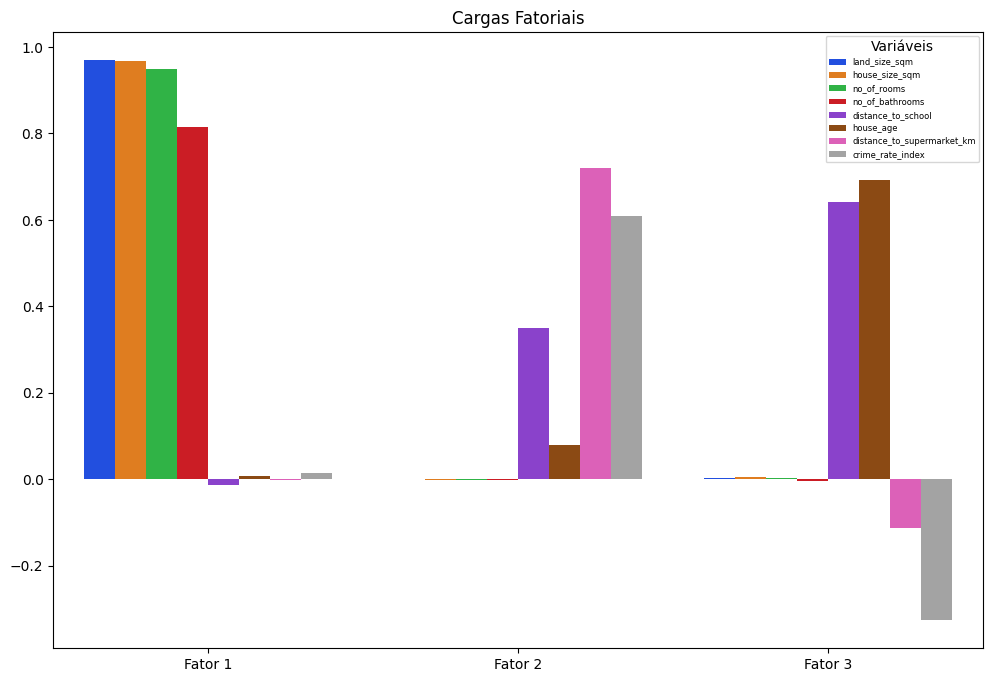

In [20]:
plt.figure(figsize=(12,8))
tabela_cargas_graph = tabela_cargas.reset_index()
tabela_cargas_graph = tabela_cargas_graph.melt(id_vars='index')

sns.barplot(data=tabela_cargas_graph, x='variable', y='value', hue='index', palette='bright')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Cargas Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

##### Determinando as comunalidades

In [21]:
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = casas_pca.columns

print(tabela_comunalidades)

                            Comunalidades
land_size_sqm                    0.939590
house_size_sqm                   0.936791
no_of_rooms                      0.900057
no_of_bathrooms                  0.663930
distance_to_school               0.535414
house_age                        0.486218
distance_to_supermarket_km       0.531702
crime_rate_index                 0.478541


##### Extração dos fatores para as observações do banco de dados

In [22]:
fatores = pd.DataFrame(fa.transform(casas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

casas = pd.concat([casas.reset_index(drop=True), fatores], axis=1)

##### Identificando os scores fatoriais

Scores fatoriais são valores que representam a associação de cada observação com fatores latentes identificados na análise fatorial. Eles são calculados usando métodos como regressão ou máxima verossimilhança. Esses scores ajudam a reduzir a dimensionalidade dos dados e a entender a estrutura subjacente, mostrando como cada observação se relaciona com os fatores. A magnitude e o sinal dos scores indicam a força e a direção dessa associação. Eles são úteis para perfilar observações, realizar análises subsequentes e visualizar padrões nos dados.

https://naime-andere.notion.site/Scores-fatoriais-8441ba8c5b0f498f88e60ae9b305646c?pvs=4

In [23]:
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = casas_pca.columns

print(tabela_scores)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.281714  0.000657  0.003377
house_size_sqm              0.281292 -0.000784  0.004987
no_of_rooms                 0.275723 -0.002487  0.002906
no_of_bathrooms             0.236809 -0.002405 -0.002837
distance_to_school         -0.004007  0.343163  0.635100
house_age                   0.002165  0.078806  0.684691
distance_to_supermarket_km -0.000287  0.706245 -0.112164
crime_rate_index            0.004510  0.598101 -0.322158


##### Analisando os scores fatoriais em cada fator extraído

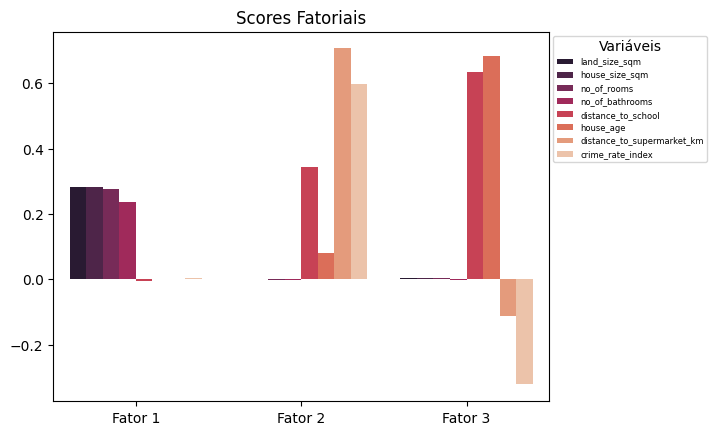

In [24]:
tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette='rocket')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

##### Ranking

consolidar os 3 fatores em uma medida única (soma ponderada)

In [25]:
casas['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    casas['Ranking'] = casas['Ranking'] + casas[tabela_eigen.index[index]]*variancia

Os preços alinham-se às características representadas nos fatores?

In [26]:
pg.rcorr(casas[['Ranking', 'property_value']], 
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

C:\Users\naime\AppData\Roaming\Python\Python311\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,Ranking,property_value
Ranking,-,***
property_value,0.8494,-
